In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from sklearn.impute import KNNImputer

# Read in data
df = pd.read_csv('movies.csv')

In [2]:
# Look at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing * 100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [4]:
# delete missing values in the columns that percentage < 2%
df.dropna(subset=['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'company', 'runtime'], inplace=True)

In [5]:
# impute missing values in the colums that percentage > 2% (budget, gross)
df_object = df.select_dtypes(include=['object'])
df_numeric = df.select_dtypes(include=['int64', 'float64'])

imputer = KNNImputer(n_neighbors=3)
new_df_numeric = imputer.fit_transform(df_numeric)

new_df_numeric = pd.DataFrame(new_df_numeric, columns = ['year', 'score', 'votes', 'budget', 'gross', 'runtime'])
new_df_object = df_object.reset_index().drop('index', axis = 1)

new_df = pd.concat([new_df_numeric, new_df_object], axis = 1)

In [6]:
new_df.head()

,year,score,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company
0,1980.0,8.4,927000.0,19000000.0,46998772.0,146.0,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,1980.0,5.8,65000.0,4500000.0,58853106.0,104.0,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,1980.0,8.7,1200000.0,18000000.0,538375067.0,124.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,1980.0,7.7,221000.0,3500000.0,83453539.0,88.0,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,1980.0,7.3,108000.0,6000000.0,39846344.0,98.0,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures


In [7]:
# Data types
new_df.dtypes

year        float64
score       float64
votes       float64
budget      float64
gross       float64
runtime     float64
name         object
rating       object
genre        object
released     object
director     object
writer       object
star         object
country      object
company      object
dtype: object

In [8]:
# change data type of columns
new_df['budget'] = new_df['budget'].astype('int64')
new_df['gross'] = new_df['gross'].astype('int64')
new_df['year'] = new_df['year'].astype('int64')

In [9]:
new_df.sort_values(by = ['gross'], inplace = False, ascending = False)

,year,score,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company
5390,2009,7.8,1100000.0,237000000,2847246203,162.0,Avatar,PG-13,Action,"December 18, 2009 (United States)",James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox
7380,2019,8.4,903000.0,356000000,2797501328,181.0,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios
3009,1997,7.8,1100000.0,200000000,2201647264,194.0,Titanic,PG-13,Drama,"December 19, 1997 (United States)",James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox
6604,2015,7.8,876000.0,245000000,2069521700,138.0,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,Lucasfilm
7180,2018,8.4,897000.0,321000000,2048359754,149.0,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353,1998,6.1,2900.0,2516666,1672,87.0,I Want You,R,Crime,"October 30, 1998 (United Kingdom)",Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,Polygram Filmed Entertainment
2871,1996,7.4,37000.0,2450000,1605,110.0,Pusher,Not Rated,Crime,"August 30, 1996 (Denmark)",Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,Balboa Entertainment
3773,2000,6.5,5200.0,2858333,1400,103.0,"Love, Honor and Obey",R,Comedy,"February 9, 2001 (United States)",Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,British Broadcasting Corporation (BBC)
7514,2019,5.2,735.0,870000,682,93.0,Run with the Hunted,Not Rated,Crime,"June 26, 2020 (United States)",John Swab,John Swab,Ron Perlman,United States,Roxwell Films


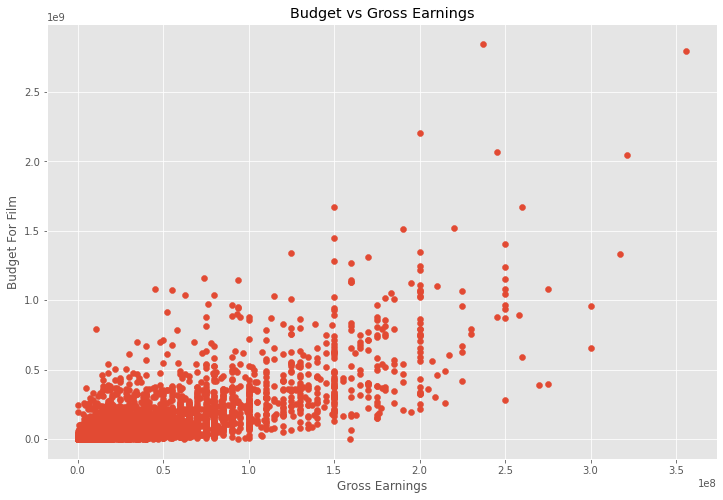

In [10]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

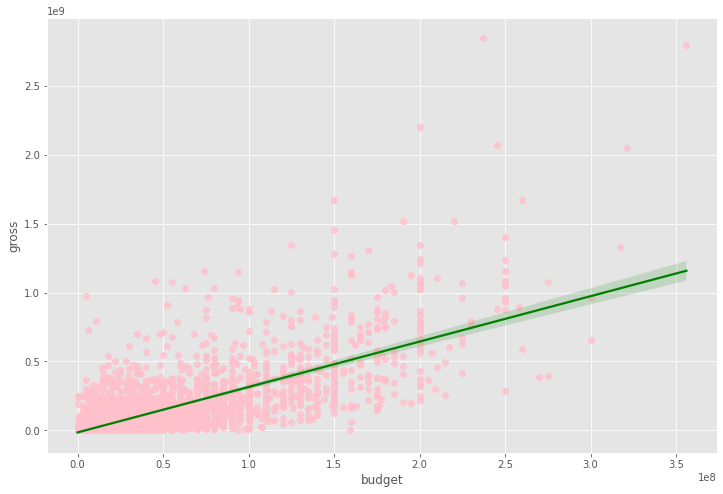

In [11]:
# plot budget vs gross using seaborn

sns.regplot(x='budget',  y='gross', data=new_df, scatter_kws={'color':'pink'}, line_kws={'color':'green'})

In [12]:
# Let's start looking at correlation
new_df.corr() #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.314216,0.264103,0.120676
score,0.102346,1.000000,0.411931,0.067596,0.188422,0.400574
votes,0.226895,0.411931,1.000000,0.482494,0.632846,0.309366
budget,0.314216,0.067596,0.482494,1.000000,0.752543,0.278856
gross,0.264103,0.188422,0.632846,0.752543,1.000000,0.244926
runtime,0.120676,0.400574,0.309366,0.278856,0.244926,1.000000


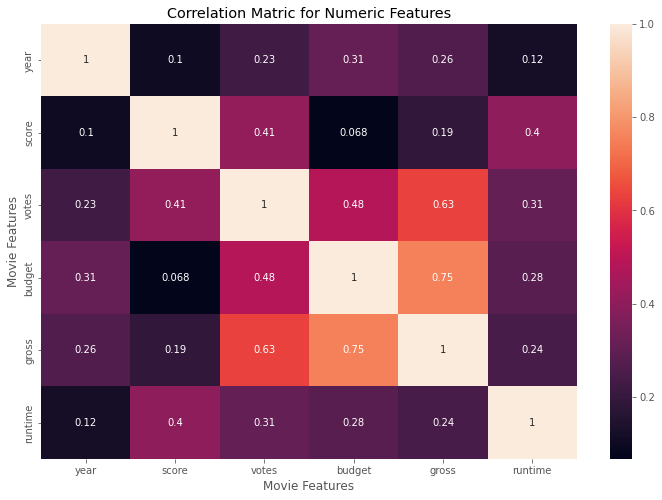

In [13]:
# High correlation between budget and gross
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [14]:
# Looks at Company

df_numerized = new_df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,year,score,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company
0,1980,8.4,927000.0,19000000,46998772,146.0,6506,6,6,1685,2544,3958,1022,54,2273
1,1980,5.8,65000.0,4500000,58853106,104.0,5498,6,1,1472,2233,1612,316,55,710
2,1980,8.7,1200000.0,18000000,538375067,124.0,5073,4,0,1751,1093,2534,1708,55,1505
3,1980,7.7,221000.0,3500000,83453539,88.0,282,4,4,1472,1279,1975,2197,55,1769
4,1980,7.3,108000.0,6000000,39846344,98.0,1016,6,4,1523,1037,511,398,55,1736


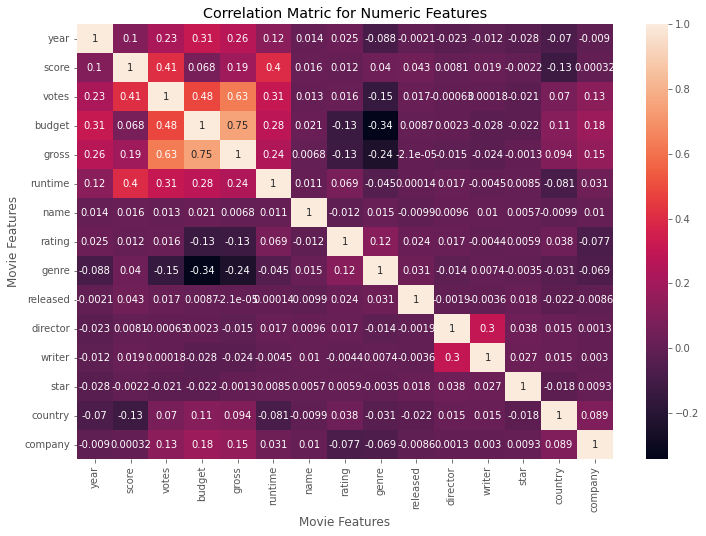

In [15]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [16]:
df_numerized.corr()

,year,score,votes,budget,gross,runtime,name,rating,genre,released,director,writer,star,country,company
year,1.000000,0.102346,0.226895,0.314216,0.264103,0.120676,0.013514,0.024989,-0.088172,-0.002088,-0.022765,-0.012318,-0.027691,-0.070266,-0.009026
score,0.102346,1.000000,0.411931,0.067596,0.188422,0.400574,0.016181,0.011538,0.040090,0.043175,0.008071,0.019084,-0.002193,-0.130094,0.000316
votes,0.226895,0.411931,1.000000,0.482494,0.632846,0.309366,0.013180,0.016086,-0.148420,0.016877,-0.000627,0.000177,-0.020977,0.069582,0.129596
budget,0.314216,0.067596,0.482494,1.000000,0.752543,0.278856,0.020883,-0.132619,-0.342277,0.008724,0.002316,-0.027557,-0.021818,0.110088,0.177050
gross,0.264103,0.188422,0.632846,0.752543,1.000000,0.244926,0.006772,-0.129187,-0.240795,-0.000021,-0.014994,-0.023766,-0.001319,0.093642,0.154708
runtime,0.120676,0.400574,0.309366,0.278856,0.244926,1.000000,0.011151,0.069089,-0.044631,0.000145,0.017386,-0.004526,0.008474,-0.081464,0.030941
name,0.013514,0.016181,0.013180,0.020883,0.006772,0.011151,1.000000,-0.011924,0.015300,-0.009906,0.009608,0.010217,0.005685,-0.009939,0.010073
rating,0.024989,0.011538,0.016086,-0.132619,-0.129187,0.069089,-0.011924,1.000000,0.117566,0.024319,0.017205,-0.004387,0.005905,0.037738,-0.076807
genre,-0.088172,0.040090,-0.148420,-0.342277,-0.240795,-0.044631,0.015300,0.117566,1.000000,0.030625,-0.013508,0.007351,-0.003525,-0.031485,-0.068678
released,-0.002088,0.043175,0.016877,0.008724,-0.000021,0.000145,-0.009906,0.024319,0.030625,1.000000,-0.001868,-0.003569,0.018026,-0.022109,-0.008570


In [17]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

year     year        1.000000
         score       0.102346
         votes       0.226895
         budget      0.314216
         gross       0.264103
                       ...   
company  director    0.001337
         writer      0.003035
         star        0.009317
         country     0.089006
         company     1.000000
Length: 225, dtype: float64

In [18]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.342277
genre    budget    -0.342277
gross    genre     -0.240795
genre    gross     -0.240795
         votes     -0.148420
                      ...   
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
country  country    1.000000
company  company    1.000000
Length: 225, dtype: float64

In [19]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross       0.632846
gross     votes       0.632846
budget    gross       0.752543
gross     budget      0.752543
year      year        1.000000
rating    rating      1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
released  released    1.000000
genre     genre       1.000000
name      name        1.000000
runtime   runtime     1.000000
gross     gross       1.000000
budget    budget      1.000000
votes     votes       1.000000
score     score       1.000000
country   country     1.000000
company   company     1.000000
dtype: float64

In [20]:
# Votes and budget have the highest correlation to gross earnings
# Company has low correlation